<a href="https://colab.research.google.com/github/Joseluismed/Tarea1_Solitones_JLMG/blob/main/Tarea1_Solitones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TAREA 1 SOLITONES

## Ejercicio 3a) Soluciones estáticas de la teoría de Klein-Gordon para el potencial de sombrero mexicano

<ipython-input-1-17275d6d8da3>:17: RuntimeWarning: overflow encountered in scalar multiply
  dvdx = l*(phi**2-nu**2)*phi  # Derivada de la velocidad con respecto a x
<ipython-input-1-17275d6d8da3>:17: RuntimeWarning: overflow encountered in scalar power
  dvdx = l*(phi**2-nu**2)*phi  # Derivada de la velocidad con respecto a x


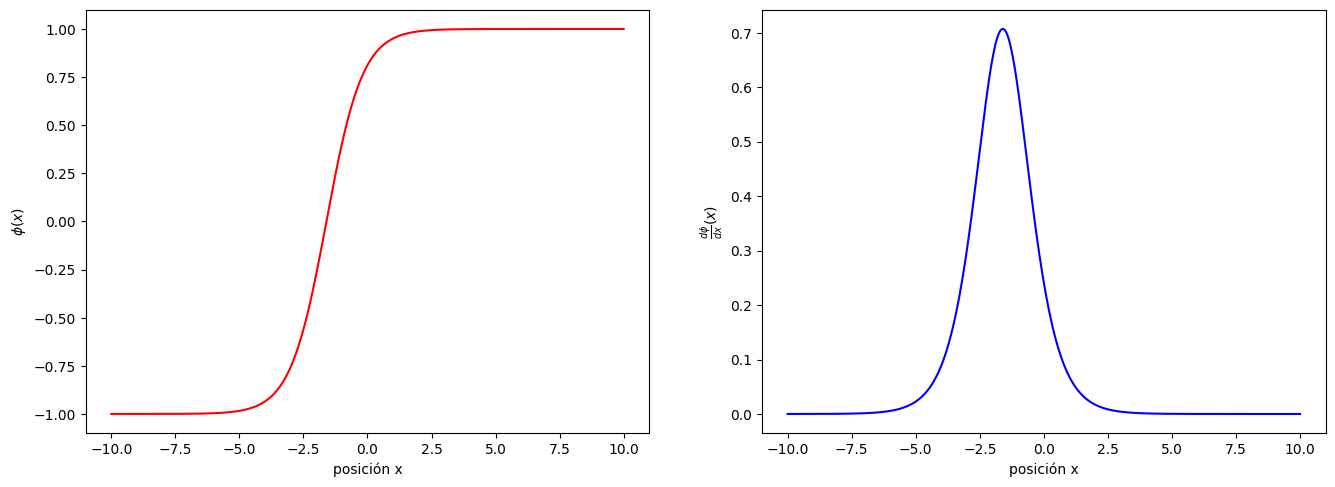

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de KG-MH
l=1
m=1
nu=m**2/l
# Definir la ecuación diferencial a resolver
def SG(phi, y):
    """
    Función que define el sistema de ecuaciones diferenciales de sine-Gordon.
    phi: posición
    y: vector de estado [phi, v]
    """
    phi, v1 = y
    dphidx = v1  # Derivada de phi con respecto a x
    dvdx = l*(phi**2-nu**2)*phi  # Derivada de la velocidad con respecto a x
    return np.array([dphidx, dvdx])

# Definir el método de Runge-Kutta de cuarto orden
def RK4Met(f, y0, a, b, npt):
    h = (b - a) / (npt - 1)
    x = np.linspace(a, b, npt)
    sol = np.zeros((npt, len(y0)))
    sol[0, :] = y0

    for i in range(1, npt):
        k1 = h * f(x[i-1], sol[i-1, :])
        k2 = h * f(x[i-1] + h/2, sol[i-1, :] + k1/2)
        k3 = h * f(x[i-1] + h/2, sol[i-1, :] + k2/2)
        k4 = h * f(x[i-1] + h, sol[i-1, :] + k3)
        sol[i, :] = sol[i-1, :] + (k1 + 2*k2 + 2*k3 + k4) / 6.0

    return x, sol

# Condiciones en la frontera
phi_a = -nu  # Valor en la frontera en x = a
phi_b = nu  # Valor en la frontera en x = b

# Intervalo y número de puntos
a = -10  # Inicio del intervalo
b = 10   # Fin del intervalo
npt = 500  # Número de puntos

# Método de shooting
def shooting_method(v0_guess):
    y0 = [phi_a, v0_guess]  # Suponer un valor inicial para la derivada
    x, sol = RK4Met(SG, y0, a, b, npt)
    phi_b_guess = sol[-1, 0]  # Valor calculado de phi en x = b
    return phi_b_guess

# Ajustar el valor inicial para cumplir con la condición de frontera
from scipy.optimize import root_scalar

sol = root_scalar(lambda v0: shooting_method(v0) - phi_b, bracket=[-10, 10], method='brentq')
v0_final = sol.root

# Solución final con el valor ajustado de la derivada inicial
y0 = [phi_a, v0_final]
x, sol = RK4Met(SG, y0, a, b, npt)
phi = sol[:, 0]
v1 = sol[:, 1]

# Graficar los resultados
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 5.5))

ax[0].plot(x, phi, c='red', label=r'$\phi(x)$')
ax[1].plot(x, v1, c='blue', label=r'$\frac{d\phi}{dx}(x)$')
ax[0].set_xlabel('posición x')
ax[1].set_xlabel('posición x')
ax[0].set_ylabel(r'$\phi(x)$')
ax[1].set_ylabel(r'$\frac{d\phi}{dx}(x)$')
plt.show()

Text(0, 0.5, '$\\rho(x)$')

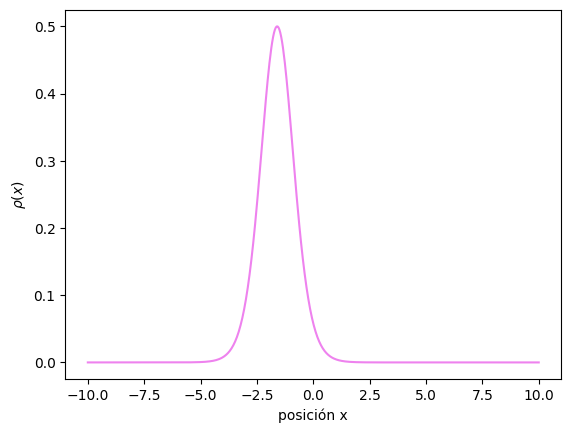

In [ ]:
#Graficando densidad de energía de KG-MH
rho=(1/2)*v1**2+(l/4)*(phi**2-nu**2)**2  #Densidad de energía
import numpy as np
import matplotlib.pyplot as plt
plt.plot(x,rho,color='violet')
plt.xlabel('posición x')
plt.ylabel(r'$\rho(x)$')

In [ ]:
#Encontrando Energía KG-MH
E=np.trapz(rho,x)
print(E)

0.9428090534272885


## Ejercicio 3b) Soluciones estáticas de la teoría de sine-Gordon

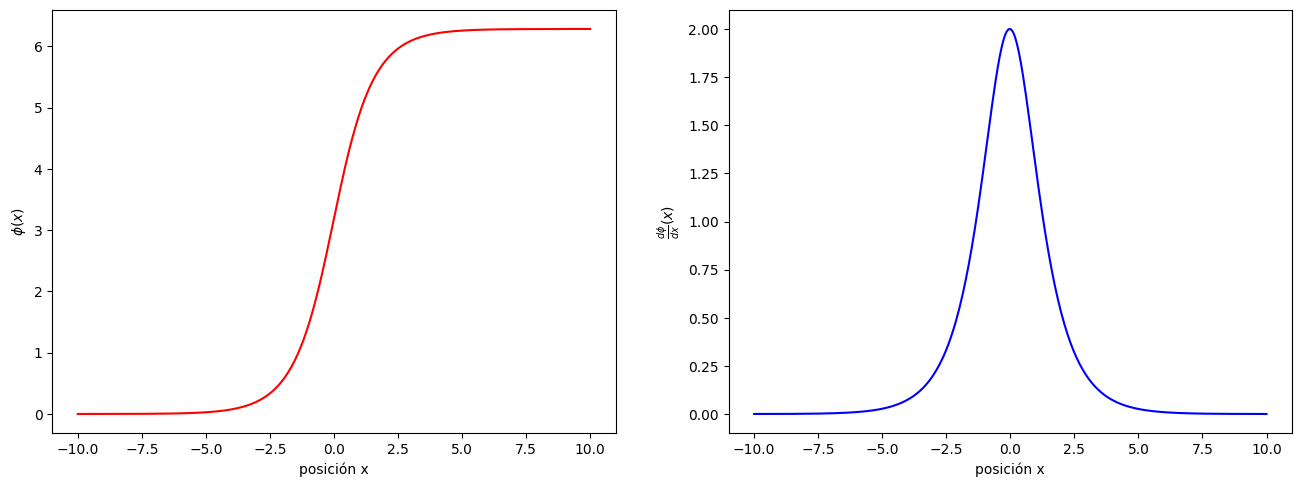

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de SG
l=1
m=1
# Definir la ecuación diferencial a resolver
def SG(phi, y):
    """
    Función que define el sistema de ecuaciones diferenciales de sine-Gordon.
    phi: posición
    y: vector de estado [phi, v]
    """
    phi, v1 = y
    dphidt = v1  # Derivada de phi con respecto a x
    dvdt = (m**3/np.sqrt(l))*np.sin((np.sqrt(l)/m)*phi)  # Derivada de la velocidad con respecto a x
    return np.array([dphidt, dvdt])

# Definir el método de Runge-Kutta de cuarto orden
def RK4Met(f, y0, a, b, npt):
    h = (b - a) / (npt - 1)
    x = np.linspace(a, b, npt)
    sol = np.zeros((npt, len(y0)))
    sol[0, :] = y0

    for i in range(1, npt):
        k1 = h * f(x[i-1], sol[i-1, :])
        k2 = h * f(x[i-1] + h/2, sol[i-1, :] + k1/2)
        k3 = h * f(x[i-1] + h/2, sol[i-1, :] + k2/2)
        k4 = h * f(x[i-1] + h, sol[i-1, :] + k3)
        sol[i, :] = sol[i-1, :] + (k1 + 2*k2 + 2*k3 + k4) / 6.0

    return x, sol

# Condiciones en la frontera
phi_a = 0.0  # Valor en la frontera en x = a
phi_b = 2*np.pi  # Valor en la frontera en x = b

# Intervalo y número de puntos
a = -10  # Inicio del intervalo
b = 10   # Fin del intervalo
npt = 500  # Número de puntos

# Método de disparo
def shooting_method(v0_guess):
    y0 = [phi_a, v0_guess]  # Suponer un valor inicial para la derivada
    x, sol = RK4Met(SG, y0, a, b, npt)
    phi_b_guess = sol[-1, 0]  # Valor calculado de phi en x = b
    return phi_b_guess

# Ajustar el valor inicial para cumplir con la condición de frontera
from scipy.optimize import root_scalar

sol = root_scalar(lambda v0: shooting_method(v0) - phi_b, bracket=[-10, 10], method='brentq')
v0_final = sol.root

# Solución final con el valor ajustado de la derivada inicial
y0 = [phi_a, v0_final]
x, sol = RK4Met(SG, y0, a, b, npt)
phi = sol[:, 0]
v1 = sol[:, 1]

# Graficar los resultados
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 5.5))

ax[0].plot(x, phi, c='red', label=r'$\phi(x)$')
ax[1].plot(x, v1, c='blue', label=r'$\frac{d\phi}{dx}(x)$')
ax[0].set_xlabel('posición x')
ax[1].set_xlabel('posición x')
ax[0].set_ylabel(r'$\phi(x)$')
ax[1].set_ylabel(r'$\frac{d\phi}{dx}(x)$')
plt.show()


Text(0, 0.5, '$\\rho(x)$')

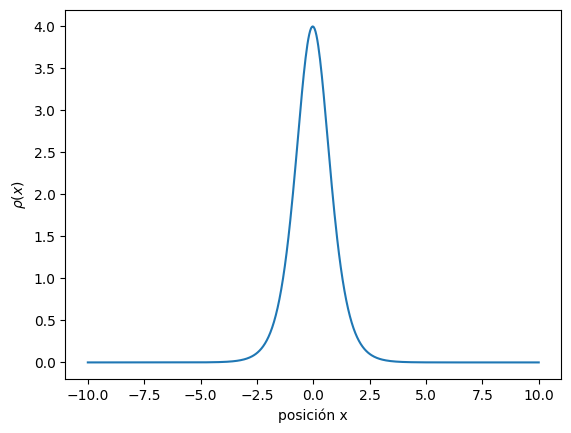

In [ ]:
#Graficando densidad de energía de SG
rho=(1/2)*v1**2+((2*m**4)/l)*np.sin((np.sqrt(l)/(2*m))*phi)**2  #Densidad de energía
import numpy as np
import matplotlib.pyplot as plt
plt.plot(x,rho)
plt.xlabel('posición x')
plt.ylabel(r'$\rho(x)$')

In [ ]:
#Encontrando Energía SG
E=np.trapz(rho,x)
print(E)

8.000000146204943


## Ejercicio 4,5) Evolución temporal de la ecuación de Klein-Gordon en 1+1 dimensiones

**Teoría libre**

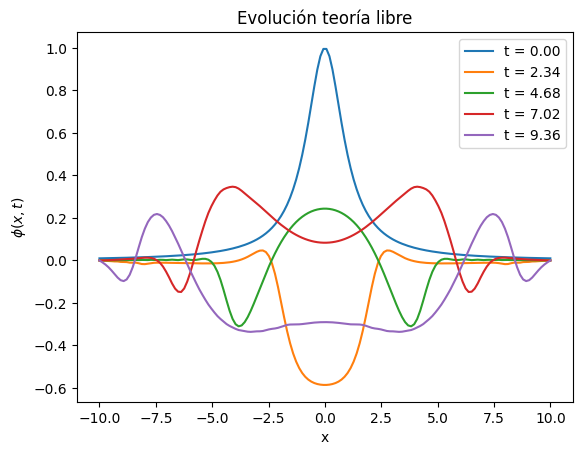

In [ ]:
#Teoría libre
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la ecuación de onda
L = 20.0           # Longitud de la cuerda
T = 10.0           # Tiempo total de simulación
Nx = 150          # Número de puntos espaciales
Nt = 300          # Número de puntos temporales
dx = L / (Nx-1)   # Paso espacial
dt = T / (Nt-1)   # Paso temporal
l=1
m=1
v0=0.3
# Parámetro de estabilidad de Courant (debe ser <= 1 para estabilidad)
s = dt / dx
if s > 1:
    raise ValueError("El parámetro de Courant debe ser <= 1 para la estabilidad.")

# Condiciones iniciales
u = np.zeros((Nt, Nx))  # Arreglo para almacenar las soluciones u(tiempo,espacio)
x = np.linspace(-L/2, L/2, Nx)

# Inicializar la forma de campo inicial phi(t0,x)
u[0, :] = 1/(1+(x)**2) #Eligiendo una distribución de Lorentz en x=0

#Encontrando u[1,:] utilizando la expansión en serie y el valor de dphi/dt (t=t0)
u[1, :] = u[0, :]   #Expansión en serie u[1,x]=u[0,x]+dphi/dt(t=0)*dt, eligiendo que la derivada respecto del tiempo inicial sea 0
# Iteración en el tiempo usando diferencias finitas
for n in range(1, Nt-1):
#Iteración en el espacio usando diferencias finitas
    for i in range(1, Nx-1):
        u[n+1, i] = 2*u[n, i] - u[n-1, i] + s**2 * (u[n, i+1] - 2*u[n, i] + u[n, i-1])-(dt)**2*m**2*u[n,i]
    u[n+1,0]=0    #Fijando condición en la frontera u(t,x0)
    u[n+1,-1]=0    #Fijando condición en la frontera u(t,xf)
#En teoría libre tenemos un único estado de vacío en 0 entonces fijamos las condiciones en la frontera en 0
# Gráfica de los resultados
for n in range(0, Nt, 70):  # Graficar cada 70 pasos de tiempo
    plt.plot(x, u[n, :], label=f"t = {n*dt:.2f}")

plt.xlabel('x')
plt.ylabel(r'$\phi(x, t)$')
plt.title('Evolución teoría libre')
plt.legend()
plt.show()

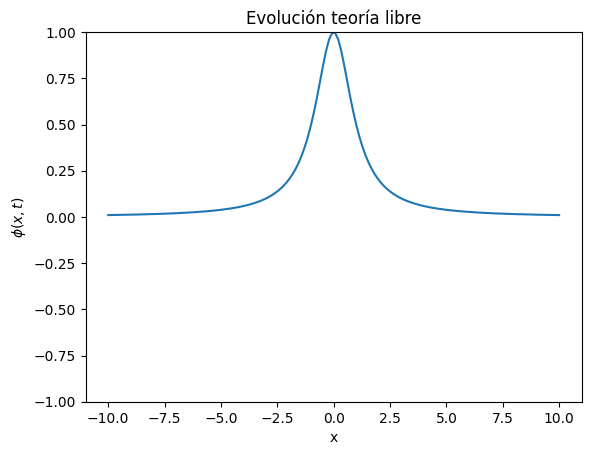

In [ ]:
#Animación de teoría libre
import matplotlib.pyplot as plt
import matplotlib.animation as animation

x = np.linspace(-L/2, L/2, Nx)
def animate(i):
  ax.clear()
  ax.plot(x,u[i*10,:])
  ax.set_ylim(-1,1)
  plt.xlabel('x')
  plt.ylabel(r'$\phi(x, t)$')
  plt.title('Evolución teoría libre')




fig,ax=plt.subplots(1,1)
ani=animation.FuncAnimation(fig,animate,frames=len(u)//10,interval=100)
ani.save('TL1Lorentziana.gif',writer='pillow',fps=5)

**Teoría λϕ4**

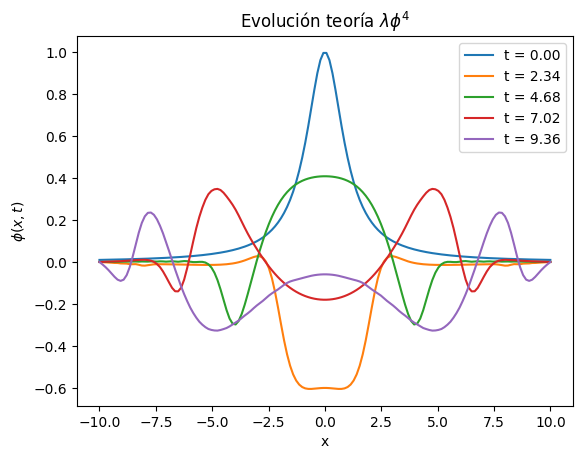

In [ ]:
#Teoría lambda phi**4
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la ecuación de onda
L = 20.0           # Longitud de la cuerda
T = 10.0           # Tiempo total de simulación
Nx = 150          # Número de puntos espaciales
Nt = 300          # Número de puntos temporales
dx = L / (Nx-1)   # Paso espacial
dt = T / (Nt-1)   # Paso temporal
l=1
m=1
v0=0.3
# Parámetro de estabilidad de Courant (debe ser <= 1 para estabilidad)
s = dt / dx
if s > 1:
    raise ValueError("El parámetro de Courant debe ser <= 1 para la estabilidad.")

# Condiciones iniciales
u = np.zeros((Nt, Nx))  # Arreglo para almacenar las soluciones u(tiempo,espacio)
x = np.linspace(-L/2, L/2, Nx)

# Inicializar la forma de campo inicial phi(t0,x)
u[0, :] = 1/(1+x**2) #Eligiendo una distribución de Lorentz en x=0

#Encontrando u[1,:] utilizando la expansión en serie y el valor de dphi/dt (t=t0)
u[1, :] = u[0, :]   #Expansión en serie u[1,x]=u[0,x]+dphi/dt(t=0)*dt, eligiendo que la derivada respecto del tiempo inicial sea 0
# Iteración en el tiempo usando diferencias finitas
for n in range(1, Nt-1):
#Iteración en el espacio usando diferencias finitas
    for i in range(1, Nx-1):
        u[n+1, i] = 2*u[n, i] - u[n-1, i] + s**2 * (u[n, i+1] - 2*u[n, i] + u[n, i-1])-(dt)**2*(m**2*u[n,i]+l*u[n,i]**3)
    u[n+1,0]=0    #Fijando condición en la frontera u(t,x0)
    u[n+1,-1]=0    #Fijando condición en la frontera u(t,xf)
#En teoría lambda phi**4 tenemos un único estado de vacío en 0 entonces fijamos las condiciones en la frontera en 0
# Gráfica de los resultados
for n in range(0, Nt, 70):  # Graficar cada 70 pasos de tiempo
    plt.plot(x, u[n, :], label=f"t = {n*dt:.2f}")

plt.xlabel('x')
plt.ylabel(r'$\phi(x, t)$')
plt.title(r'Evolución teoría $\lambda \phi^{4}$')
plt.legend()
plt.show()

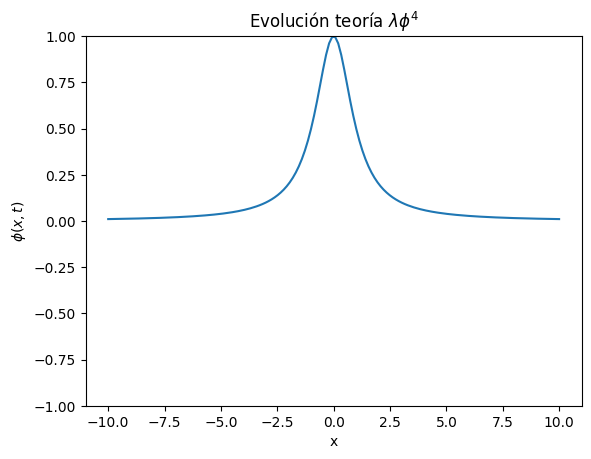

In [ ]:
#Animación de teoría lambda phi**4
import matplotlib.pyplot as plt
import matplotlib.animation as animation

x = np.linspace(-L/2, L/2, Nx)
def animate(i):
  ax.clear()
  ax.plot(x,u[i*10,:])
  ax.set_ylim(-1,1)
  plt.xlabel('x')
  plt.ylabel(r'$\phi(x, t)$')
  plt.title(r'Evolución teoría $\lambda \phi^{4}$')




fig,ax=plt.subplots(1,1)
ani=animation.FuncAnimation(fig,animate,frames=len(u)//10,interval=100)
ani.save('TLphi4-1Lorentziana.gif',writer='pillow',fps=5)

**Potencial del sombrero mexicano**

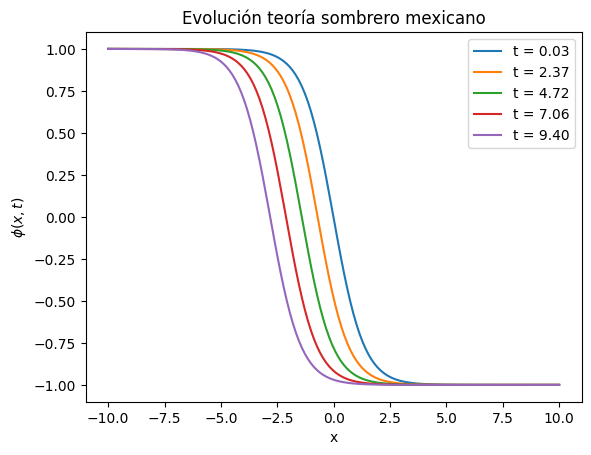

In [1]:
#Potencial sombrero mexicano MH
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la ecuación de onda
L = 20.0           # Longitud de la cuerda
T = 10.0           # Tiempo total de simulación
Nx = 150          # Número de puntos espaciales
Nt = 300          # Número de puntos temporales
dx = L / (Nx-1)   # Paso espacial
dt = T / (Nt-1)   # Paso temporal
l=1
m=1
nu=(m**2)/l
v0=0.3
# Parámetro de estabilidad de Courant (debe ser <= 1 para estabilidad)
s = dt / dx
if s > 1:
    raise ValueError("El parámetro de Courant debe ser <= 1 para la estabilidad.")

# Condiciones iniciales
u = np.zeros((Nt, Nx))  # Arreglo para almacenar las soluciones u(tiempo,espacio)
x = np.linspace(-L/2, L/2, Nx)

# Inicializar la forma de campo inicial phi(t0,x)
u[0, :] = -nu*np.tanh((m*(x)/(np.sqrt(2*(1-v0**2)))))

#Encontrando u[1,:] utilizando la expansión en serie y el valor de dphi/dt (t=t0)
u[1, :] = u[0, :] -dt*((m*nu*v0)/(np.sqrt(2*(1-v0**2))))*(1/(np.cosh((m*(x))/(np.sqrt(2*(1-v0**2))))**2))  #Expansión en serie u[1,x]=u[0,x]+dphi/dt(t=0)*dt
#Cambiamos el signo entre + y - en el segundo término dependiendo de la dirección de movimiento del campo
# Iteración en el tiempo usando diferencias finitas
for n in range(1, Nt-1):
#Iteración en el espacio usando diferencias finitas
    for i in range(1, Nx-1):
        u[n+1, i] = 2*u[n, i] - u[n-1, i] + s**2 * (u[n, i+1] - 2*u[n, i] + u[n, i-1])-(dt)**2*l*u[n,i]*(u[n,i]**2-nu**2)
    u[n+1,0]=nu    #Fijando condición en la frontera u(t,x0)
    u[n+1,-1]=-nu    #Fijando condición en la frontera u(t,xf)
#En potencial del sombrero mexicano tenemos dos estados de vacío en phi=-nu y phi=nu entonces fijamos las condiciones en la frontera en alguno de estos estados
# Gráfica de los resultados
for n in range(1, Nt, 70):  # Graficar cada 70 pasos de tiempo
    plt.plot(x, u[n, :], label=f"t = {n*dt:.2f}")

plt.xlabel('x')
plt.ylabel(r'$\phi(x, t)$')
plt.title(r'Evolución teoría sombrero mexicano')
plt.legend()
plt.show()

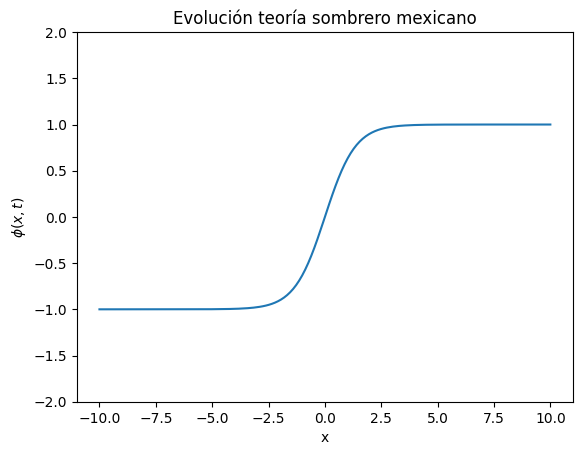

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation

x = np.linspace(-L/2, L/2, Nx)
def animate(i):
  ax.clear()
  ax.plot(x,u[i*10,:])
  ax.set_ylim(-2,2)
  plt.xlabel('x')
  plt.ylabel(r'$\phi(x, t)$')
  plt.title(r'Evolución teoría sombrero mexicano')




fig,ax=plt.subplots(1,1)
ani=animation.FuncAnimation(fig,animate,frames=len(u)//10,interval=100)
ani.save('KG_MH1kinkderecha.gif',writer='pillow',fps=5)

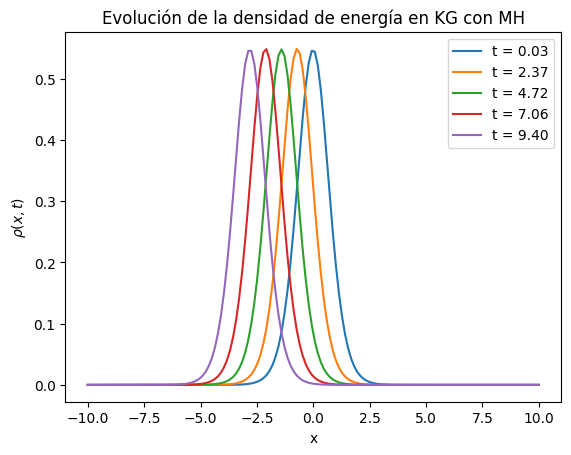

In [2]:
#Gráfica de densidad de energía de KG con MH en movimiento
import numpy as np
import matplotlib.pyplot as plt
rho = np.zeros((Nt, Nx))
for n in range(1, Nt-1):
    for i in range(1, Nx-1):
      dux=(u[n,i+1]-u[n,i-1])/(2*dx)      #Encontrando dphi/dx utilizando diferencias finitas centrales
      dut=(u[n+1,i]-u[n-1,i])/(2*dt)      #Encontrando dphi/dt utilizando diferencias finitas centrales
      rho[n,i]=(1/2)*dux**2+(l/4)*(u[n,i]**2-nu**2)**2 +(1/2)*dut**2     #Densidad de energía para solución en movimiento


for n in range(1, Nt, 70):  # Graficar cada 70 pasos de tiempo
    plt.plot(x, rho[n, :], label=f"t = {n*dt:.2f}")

plt.xlabel('x')
plt.ylabel(r'$\rho(x, t)$')
plt.title('Evolución de la densidad de energía en KG con MH')
plt.legend()
plt.show()

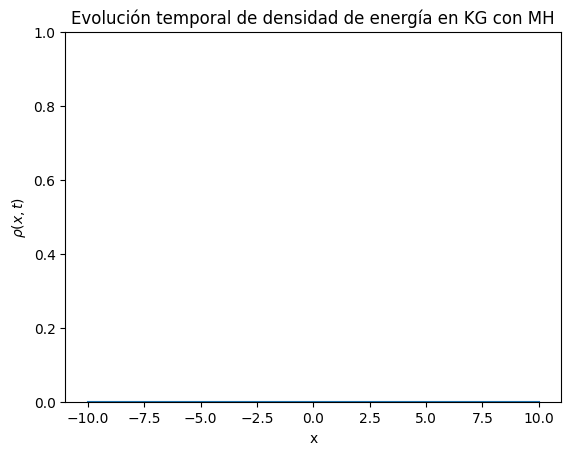

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation

x = np.linspace(-L/2, L/2, Nx)
def animate(i):
  ax.clear()
  ax.plot(x,rho[i*10,:])
  ax.set_ylim(0,1)
  plt.xlabel('x')
  plt.ylabel(r'$\rho(x, t)$')
  plt.title('Evolución temporal de densidad de energía en KG con MH')




fig,ax=plt.subplots(1,1)
ani=animation.FuncAnimation(fig,animate,frames=len(u)//10,interval=100)
ani.save('KG_MH1rhokinkderecha.gif',writer='pillow',fps=5)

In [3]:
#Calculo de energía en distintos instantes de tiempo
E=np.trapz(rho,x)
print(E)
print('El promedio de la energía es: ', np.mean(E))

[0.         0.9870331  0.98703293 0.98703274 0.98703255 0.98703234
 0.98703212 0.98703189 0.98703165 0.9870314  0.98703114 0.98703088
 0.98703061 0.98703033 0.98703006 0.98702978 0.98702951 0.98702923
 0.98702896 0.98702869 0.98702843 0.98702817 0.98702792 0.98702767
 0.98702743 0.9870272  0.98702699 0.98702678 0.98702658 0.98702639
 0.98702621 0.98702605 0.98702589 0.98702575 0.98702562 0.9870255
 0.98702539 0.98702529 0.98702521 0.98702513 0.98702507 0.98702501
 0.98702496 0.98702493 0.9870249  0.98702488 0.98702487 0.98702487
 0.98702487 0.98702488 0.9870249  0.98702492 0.98702495 0.98702498
 0.98702502 0.98702507 0.98702511 0.98702516 0.98702522 0.98702528
 0.98702534 0.98702541 0.98702548 0.98702555 0.98702562 0.9870257
 0.98702577 0.98702585 0.98702593 0.98702602 0.9870261  0.98702619
 0.98702628 0.98702637 0.98702646 0.98702655 0.98702665 0.98702674
 0.98702684 0.98702693 0.98702703 0.98702713 0.98702723 0.98702733
 0.98702744 0.98702754 0.98702764 0.98702775 0.98702785 0.987027

**Teoría sine-Gordon**

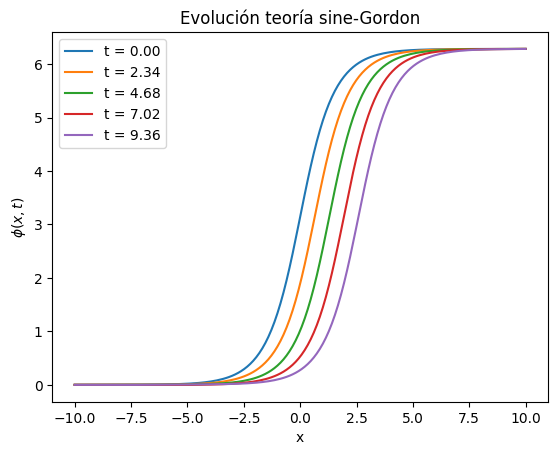

In [ ]:
#Teoría sine-Gordon
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la ecuación de onda
L = 20.0           # Longitud de la cuerda
T = 10.0           # Tiempo total de simulación
Nx = 150          # Número de puntos espaciales
Nt = 300          # Número de puntos temporales
dx = L / (Nx-1)   # Paso espacial
dt = T / (Nt-1)   # Paso temporal
l=1
m=1
v0=0.3
# Parámetro de estabilidad de Courant (debe ser <= 1 para estabilidad)
s = dt / dx
if s > 1:
    raise ValueError("El parámetro de Courant debe ser <= 1 para la estabilidad.")

# Condiciones iniciales
u = np.zeros((Nt, Nx))  # Arreglo para almacenar las soluciones u(tiempo,espacio)
x = np.linspace(-L/2, L/2, Nx)

# Inicializar la forma de campo inicial phi(t0,x)
u[0, :] = ((4*m)/np.sqrt(l))*np.arctan(np.exp((m*(x))/(np.sqrt(1-v0**2))))

#Encontrando u[1,:] utilizando la expansión en serie y el valor de dphi/dt (t=t0)
u[1, :] = u[0, :]-dt*((4*m**2*v0)/(np.sqrt(l*(1+v0**2))))*(np.exp((m*(x)/(np.sqrt(1-v0**2))))/(1+np.exp((2*m*(x))/(np.sqrt(1-v0**2)))))  #Expansión en serie u[1,x]=u[0,x]+dphi/dt(t=0)*dt
#Cambiamos el signo entre + y - en el segundo término dependiendo de la dirección de movimiento del campo
# Iteración en el tiempo usando diferencias finitas
for n in range(1, Nt-1):
#Iteración en el espacio usando diferencias finitas
    for i in range(1, Nx-1):
        u[n+1, i] = 2*u[n, i] - u[n-1, i] + s**2 * (u[n, i+1] - 2*u[n, i] + u[n, i-1])-(dt)**2*(m**3/np.sqrt(l))*np.sin((np.sqrt(l)/m)*u[n,i])
    u[n+1,0]=0    #Fijando condición en la frontera u(t,x0)
    u[n+1,-1]=2*np.pi    #Fijando condición en la frontera u(t,xf)
#En teoría de sine-Gordon tenemos infinitos estados de vacío en phi=2k pi entonces fijamos las condiciones en la frontera en alguno de estos estados
# Gráfica de los resultados
for n in range(0, Nt, 70):  # Graficar cada 70 pasos de tiempo
    plt.plot(x, u[n, :], label=f"t = {n*dt:.2f}")

plt.xlabel('x')
plt.ylabel(r'$\phi(x, t)$')
plt.title(r'Evolución teoría sine-Gordon')
plt.legend()
plt.show()

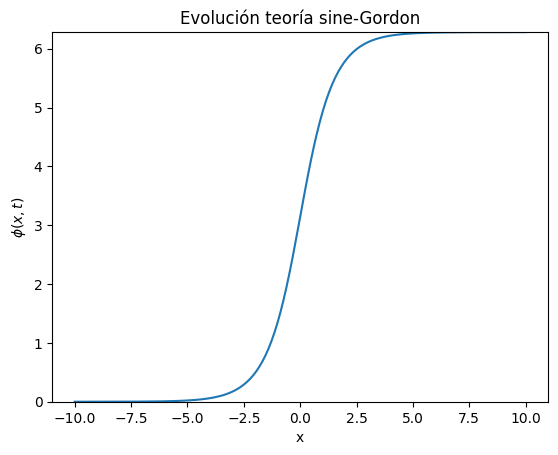

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation

x = np.linspace(-L/2, L/2, Nx)
def animate(i):
  ax.clear()
  ax.plot(x,u[i*10,:])
  ax.set_ylim(0,2*np.pi)
  plt.xlabel('x')
  plt.ylabel(r'$\phi(x, t)$')
  plt.title('Evolución teoría sine-Gordon')




fig,ax=plt.subplots(1,1)
ani=animation.FuncAnimation(fig,animate,frames=len(u)//10,interval=100)
ani.save('SG1kinkderecha.gif',writer='pillow',fps=5)

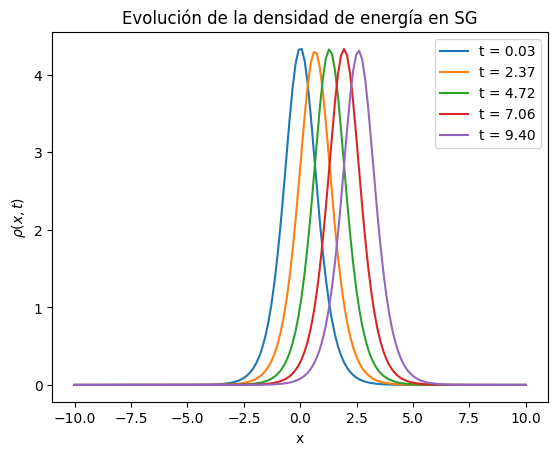

In [ ]:
#Gráfica de densidad de energía de SG
import numpy as np
import matplotlib.pyplot as plt
rho = np.zeros((Nt, Nx))
for n in range(1, Nt-1):
    for i in range(1, Nx-1):
      dux=(u[n,i+1]-u[n,i-1])/(2*dx)      #Encontrando dphi/dx utilizando diferencias finitas centrales
      dut=(u[n+1,i]-u[n-1,i])/(2*dt)      #Encontrando dphi/dt utilizando diferencias finitas centrales
      rho[n,i]=(1/2)*dux**2+((2*m**4)/l)*np.sin(((np.sqrt(l))/(2*m))*u[n,i])**2 +(1/2)*dut**2     #Densidad de energía para solución en movimiento


for n in range(1, Nt, 70):  # Graficar cada 70 pasos de tiempo
    plt.plot(x, rho[n, :], label=f"t = {n*dt:.2f}")

plt.xlabel('x')
plt.ylabel(r'$\rho(x, t)$')
plt.title('Evolución de la densidad de energía en SG')
plt.legend()
plt.show()

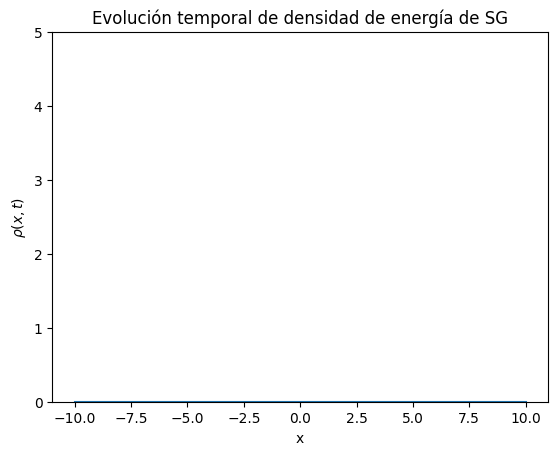

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation

x = np.linspace(-L/2, L/2, Nx)
def animate(i):
  ax.clear()
  ax.plot(x,rho[i*10,:])
  ax.set_ylim(0,5)
  plt.xlabel('x')
  plt.ylabel(r'$\rho(x, t)$')
  plt.title('Evolución temporal de densidad de energía de SG')




fig,ax=plt.subplots(1,1)
ani=animation.FuncAnimation(fig,animate,frames=len(u)//10,interval=100)
ani.save('SG1rhokinkderecha.gif',writer='pillow',fps=5)

In [ ]:
#Calculo energía en distintos instantes de tiempo
E=np.trapz(rho,x)
print(E)
print('El promedio de la energía es:', np.mean(E))

[0.         8.31477049 8.31476988 8.31476947 8.31476931 8.31476939
 8.3147697  8.31477025 8.31477104 8.31477206 8.31477333 8.31477483
 8.31477657 8.31477854 8.31478072 8.31478313 8.31478575 8.31478858
 8.3147916  8.31479481 8.3147982  8.31480176 8.31480548 8.31480934
 8.31481335 8.31481747 8.31482171 8.31482605 8.31483048 8.31483498
 8.31483955 8.31484417 8.31484883 8.31485352 8.31485822 8.31486293
 8.31486764 8.31487232 8.31487698 8.31488161 8.31488619 8.31489072
 8.31489518 8.31489958 8.3149039  8.31490814 8.31491229 8.31491635
 8.31492031 8.31492417 8.31492791 8.31493155 8.31493507 8.31493847
 8.31494175 8.31494491 8.31494794 8.31495084 8.31495362 8.31495627
 8.31495879 8.31496118 8.31496344 8.31496557 8.31496757 8.31496943
 8.31497117 8.31497278 8.31497426 8.31497561 8.31497683 8.31497793
 8.3149789  8.31497975 8.31498048 8.31498109 8.31498158 8.31498195
 8.31498221 8.31498236 8.31498239 8.31498231 8.31498213 8.31498183
 8.31498144 8.31498094 8.31498035 8.31497966 8.31497887 8.3149